# Projet : Trajectoire d’un bras de robot à 2 articulations




### Generale:

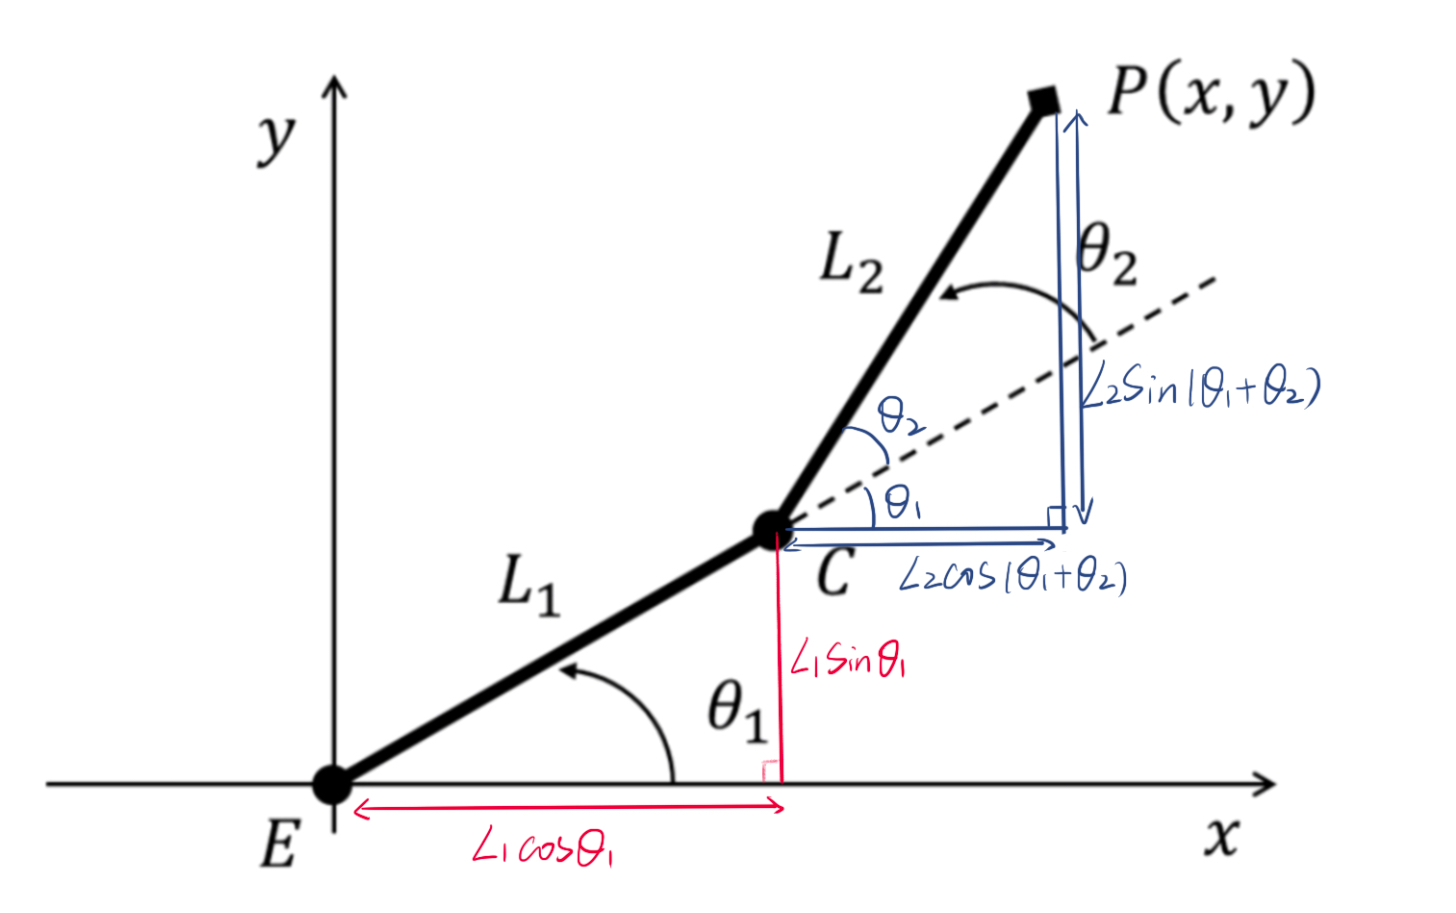




Les coordonnées du point c sont（$L_1cos(\theta_1)$,$L_1sin(\theta_1)$)

Pour point P:
$$x = L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2) \\   

y = L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)$$ 

On defini $$ X = \begin{pmatrix}x  \\ y  \end{pmatrix}$$

$\theta = \begin{pmatrix}\theta_1 \\ \theta_2  \end{pmatrix}$


$R(\theta)=F(\theta)-X$

$R(\theta)=\begin{pmatrix}L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x  \\ L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y  \end{pmatrix}$

### L'existence de solution

Les angles $\theta_1$ et $\theta_2$ doivent être compris entre -180&deg; et 180&deg;, ce qui correspond à -3,14 et 3.14 en radians.  
Les zones qui peuvent être atteintes par ce bras robotique (zones où des solutions existent). 

- Premiers cas: L2 > L1  
Domaines possibles: Cercle de rayon L1+L2 avec l'origine comme centre  
Pour tous les points sauf sur le cercle de rayon L1+L2, il existe deux solutions.

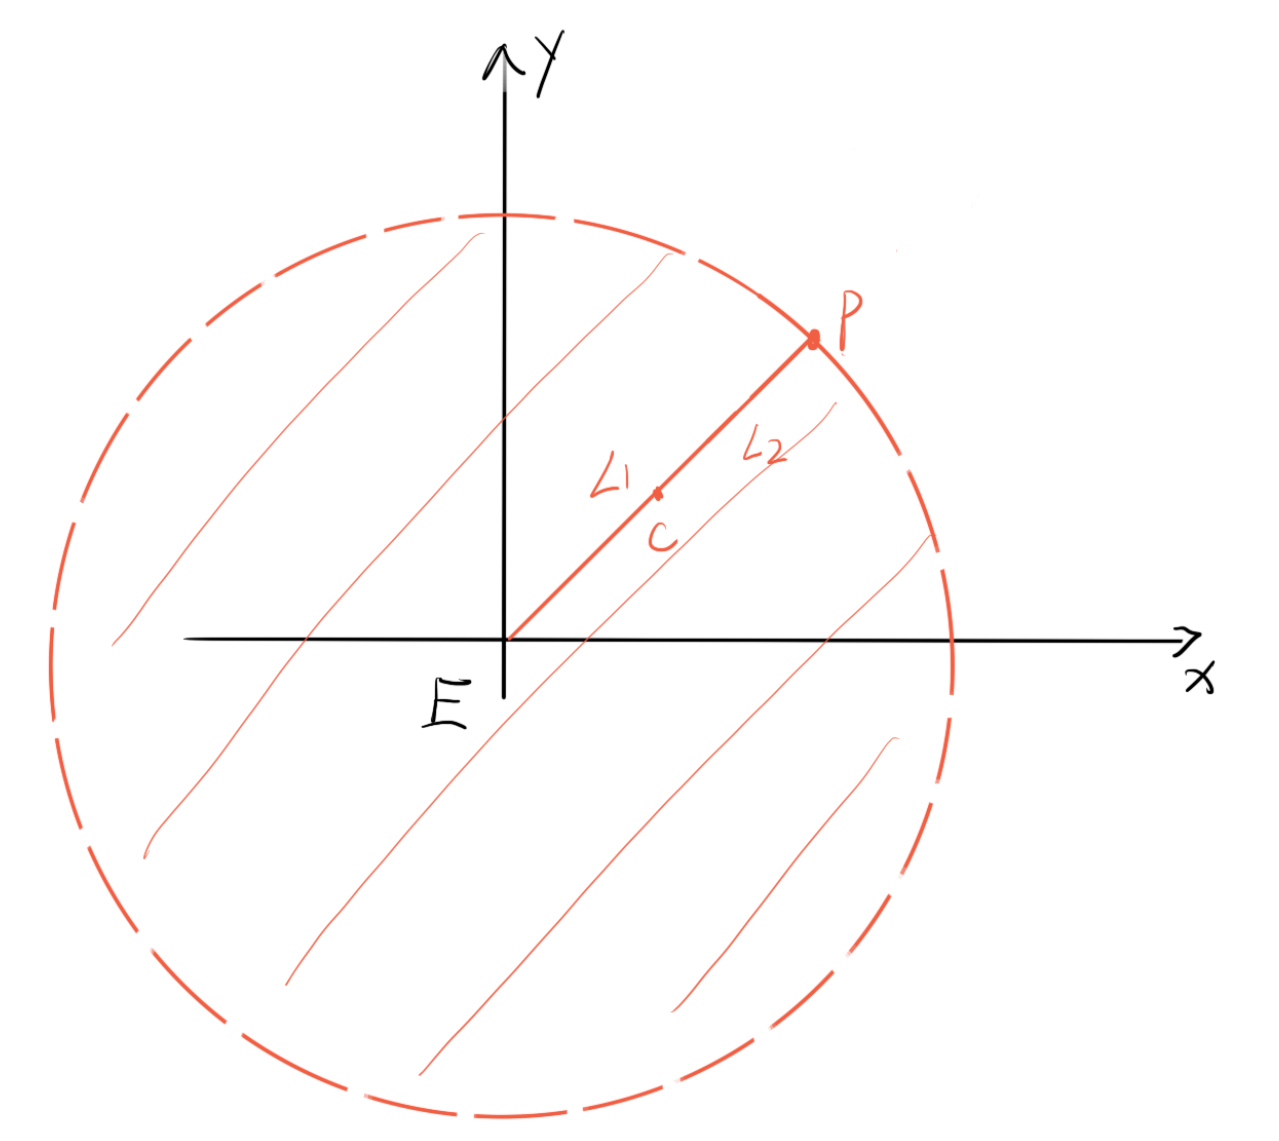

- Deuxième cas: L2 < L1  
Domaines possibles：un cercle de rayon L1+L2 avec l'origine comme centre, le cercle central de rayon L1-L2 ne peut être touché

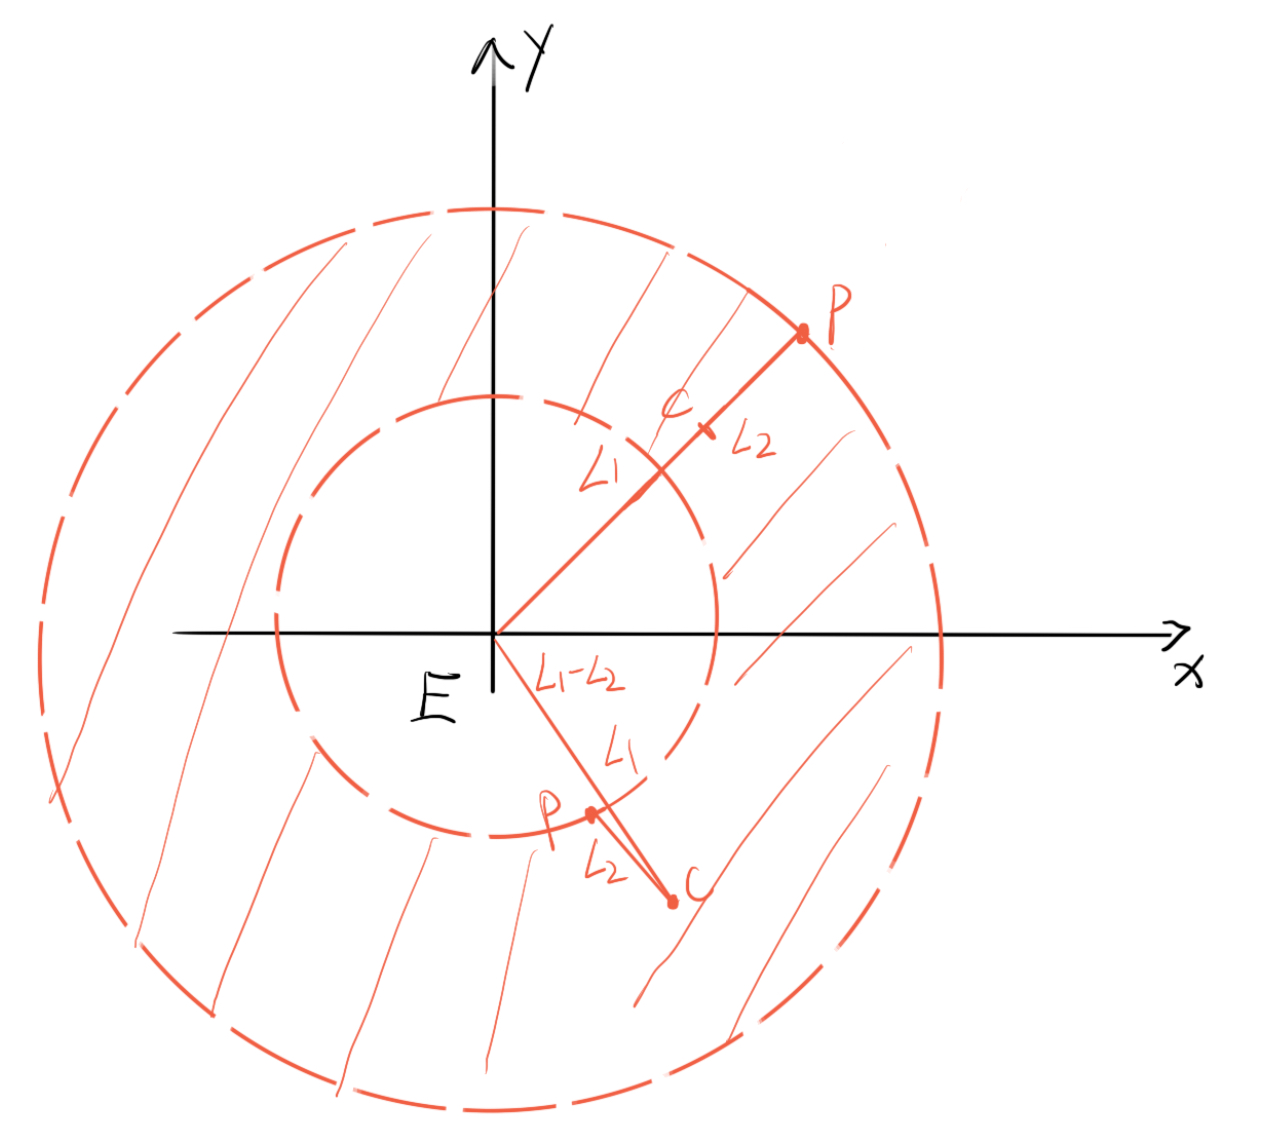

- Troisième cas: L2 = L1  
Domaines possibles: Cercle de rayon L1+L2 avec l'origine E comme centre.

Pour l'origine E, le bras du robot peut être atteint dans n'importe quelle attitude, il existe donc une infinité de solutions.
Pour toutes les autres régions atteignables, sauf sur la circonférence du cercle de rayon L1+L2, il existe deux solutions.  
Il existe deux solutions pour toutes les régions, sauf l'origine et la frontière.

- ### Première méthode

Première méthode : utiliser la fonction « root » de la bibliothèque scypy.optimize appliquées au résidu.

$R(\theta)=0$

$L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x=0$ 

$L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y=0$

In [2]:
#Importation des bibliothèque
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from Fonctions import * 
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Pour toutes le codes suivantes, nous appliquons $x = 1{\,}  
 y = 1 {\,}
 L_1=1 {\,}
 L_2=1$ pour tester

In [3]:
#Déclaration des variables
L1 = 1 
L2 = 1
x = 1
y = 1

# Paramètres de la fonction résidu à annuler
param = [L1, L2, x, y]


In [4]:

# Valeur initial
val_init = [0,0]

# Résolution par la méthode root
sol_root = scipy.optimize.root(R,val_init,param).x

# Print des solutions
print(f"Theta1 = {sol_root[0]} \nTheta2 = {sol_root[1]}")

Theta1 = 1.5707963267933236 
Theta2 = -1.5707963267934593


Parler de la solution ............

- ### Deuxième méthode 

utiliser la fonction « minimize » de la bibliothèque scypy.optimize 

$||R(\theta)||^2 = (L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x)^2+(L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y)^2$

Utilisez le code ci-dessous pour simplifier l'équation et calculer les dérivées partielles de premier et de second ordre de l'équation：

In [5]:
# Valeur initial
x0 = np.asarray((1.5, -1.5))

# Résolution par la méthode minimize
sol_minimiz = scipy.optimize.minimize(R2,x0,param, method='SLSQP').x

# Print des solutions
print(f"Theta1 = {sol_minimiz[0]} \nTheta2 = {sol_minimiz[1]}")

Theta1 = 1.5709503691423097 
Theta2 = -1.5711464344353756


Bla Bla ....................

Pour les régions sans solution, la valeur du carré du résidu sera supérieure à 0. 
Par exemple, si on choisit L1=1 L2=1 x=2 y=2.
De la discussion précédente, il est clair qu'il ne devrait pas y avoir de solution à cette coordonnée.
Les résultats que nous avons obtenus est：Carré du résidu = 0.6862915519821016


Pour les régions à solutions multiples, la solution de l'équation est liée au choix du point de prédiction.
Par exemple,si on choisit L1=1 L2=1 x=1 y=1.Points de prédiction = (1.5, -1.5).
Résultats obtenus：[1.57095037 -1.57114645]

On peut voir que cette valeur est la même que celle obtenue par la première méthode.

Points de prédiction = (0, 0),Résultats obtenus：[-7.94698179e-05  1.57082587e+00]

comment faut-il interpréter un minimum qui ne serait pas nul ?

- ### Troisième méthode 

#### la méthode des gradients

#### Méthode de descente du gradient à pas fixe

Cette partie du code se trouve dans le fichier a. Utiliser d'autres logiciels pour mieux visualiser les dessins 3D

La dérivée de la fonction (gradient) = 0 car elle se trouve au point extrême, et l'itération est arrêtée lorsque la valeur de la variation du gradient de la fonction atteint la valeur fixée.

L'itération s'arrête lorsque la différence entre les valeurs de la fonction avant et après la mise à jour de la variable indépendante atteint une valeur d'erreur définie.


C:\Users\33695\AppData\Local\Temp\ipykernel_86376\612846778.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter3D(point_X, point_Y, point_Z, cmap='Black')


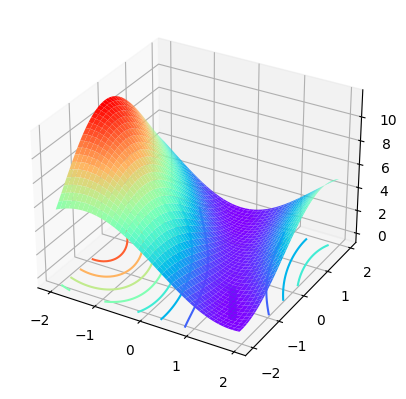

In [6]:
ax1 = plt.axes(projection='3d')

point_X, point_Y, point_Z = grad(R2,dR2 , 0.5, -1, 0.1, 0.000001, 100, param) 
X = np.arange(-2, 2, 0.05)

Y = np.arange(-2, 2, 0.05)

Z = [[0]*len(Y) for i in range(len(X))]
for i in range(len(X)):
    for j in range(len(Y)):
        dx,dy = dR2([X[i], Y[j]],param)
        f = R2([X[i], Y[j]],param)
        Z[j][i] = f
Z1 = np.array(Z)

X, Y = np.meshgrid(X, Y)

ax1.scatter3D(point_X, point_Y, point_Z, cmap='Black')  
ax1.plot_surface(X, Y, Z1, cmap='rainbow')
ax1.contour(X,Y,Z1,offset=-1,cmap='rainbow')

plt.show()

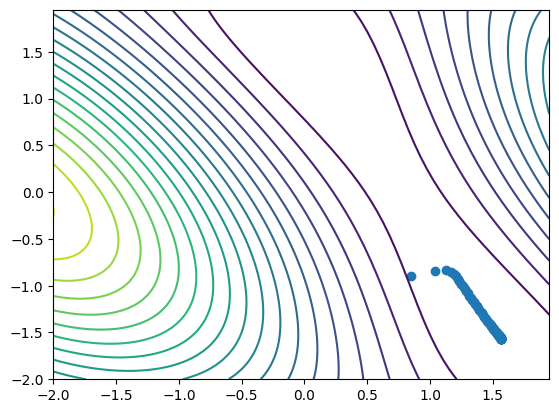

In [7]:
plt.contour(X,Y,Z1,20)

plt.scatter(point_X,point_Y)

Le choix de la longueur des pas est important. La longueur de pas détermine la longueur de chaque pas dans la direction négative du gradient pendant l'itération de descente du gradient. Si cette valeur est trop grande, le point de valeur extrême risque d'être manqué et la convergence ne sera pas possible. Si cette valeur est trop petite, la convergence sera lente.

L'image de surface 3D de la fonction est la suivante

Ici, les deux radians d'angle (x et y)prennent les valeurs de -3,14 à 3,14.

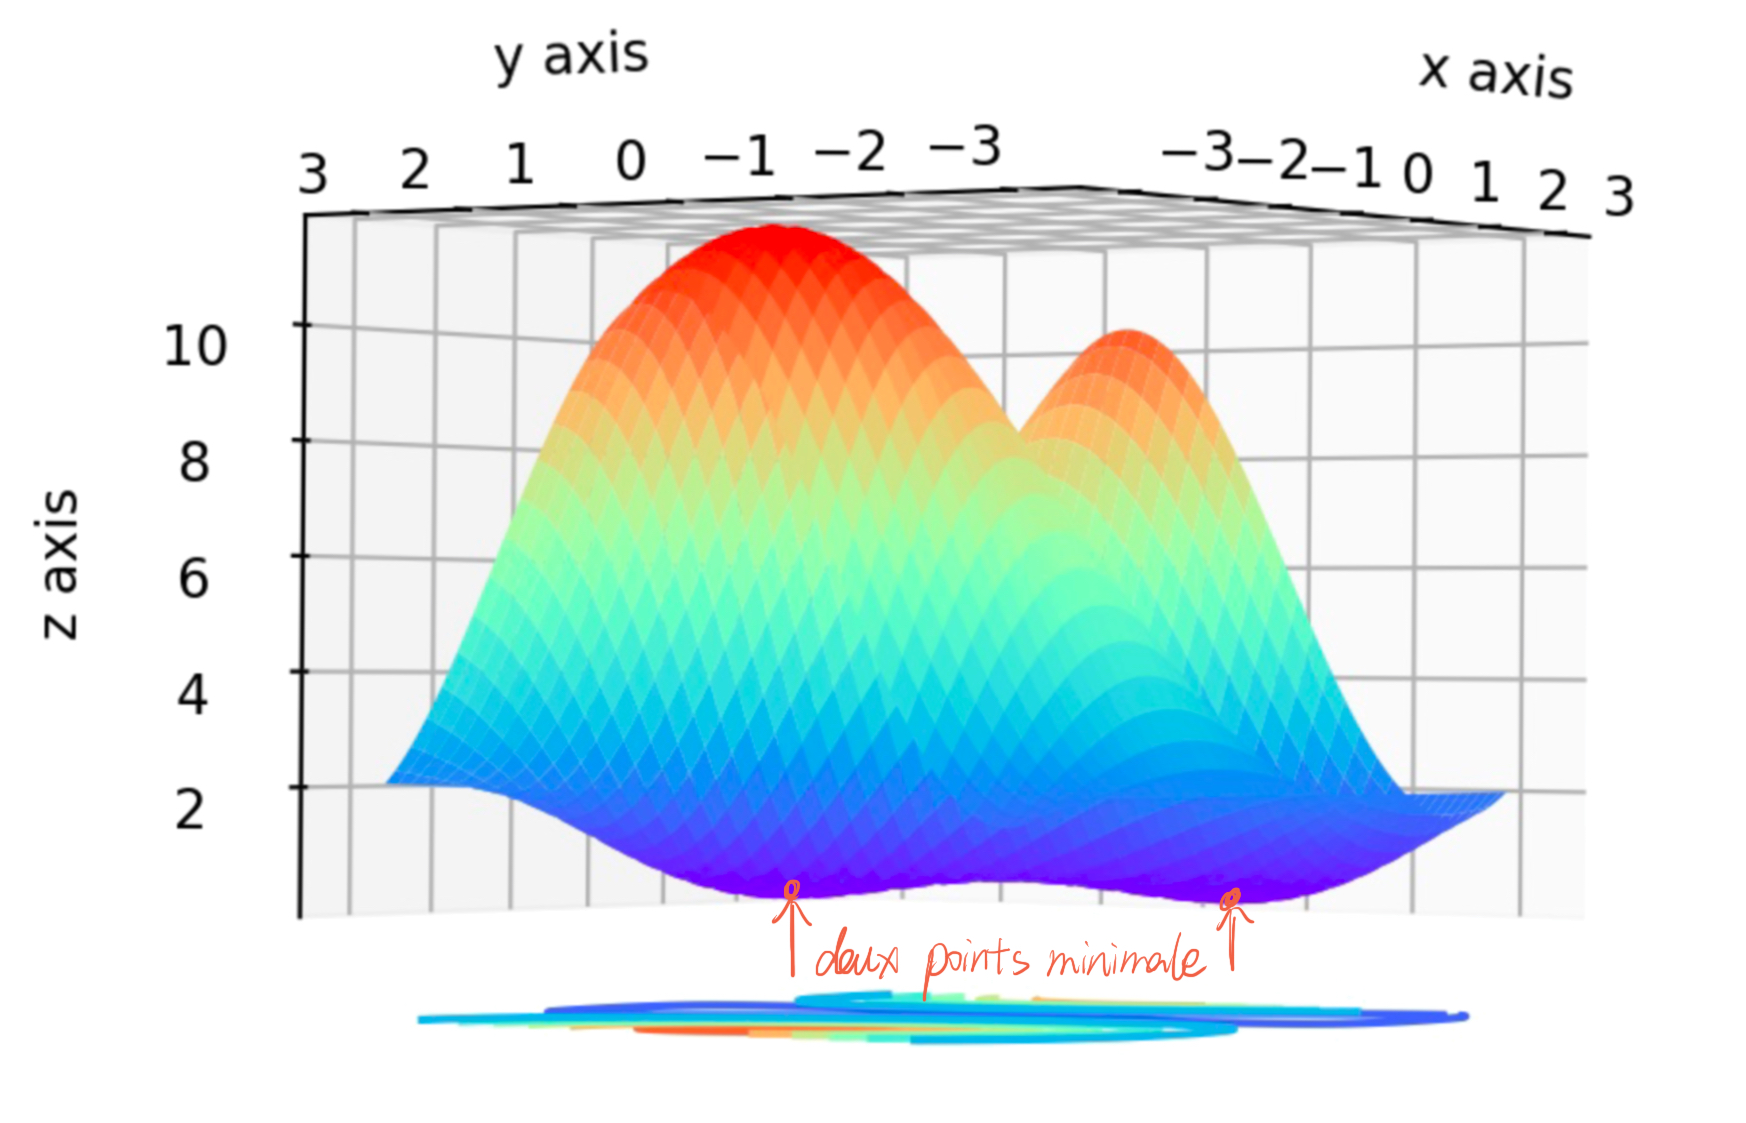

A partir du graphique, on peut vérifier que la fonction a deux minima et donc deux solutions

In [8]:
# Print des solutions
print(f"Theta1 = {point_X[-1]} \nTheta2 = {point_Y[-1]}")

Theta1 = 1.5688829757705218 
Theta2 = -1.56769731917993


#### Méthode de descente du gradient à pas optimal

Cette méthode est à peu près la même que la méthode de Newton à pas fixe, sauf que nous mettons à jour le pas du pas après chaque itération.

- #### Méthode de Newton

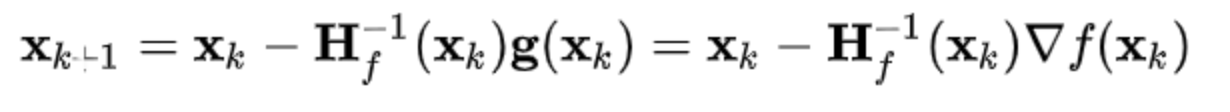

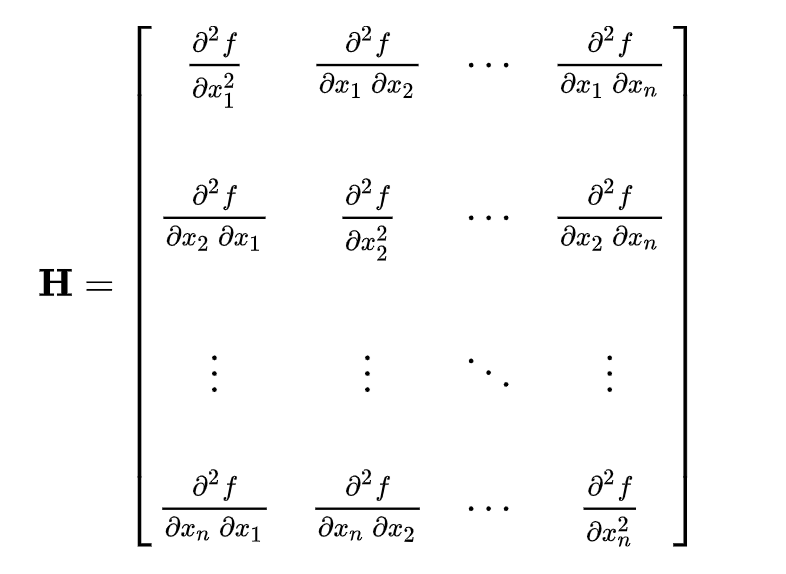

Pour les fonctions binaires：
$$H=
 \left[
 \begin{matrix}
   \frac{\partial^2 f}{\partial x_1^2}  & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\
   \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2}  \\
  \end{matrix}
  \right] 
$$

La dérivée de second ordre de l'équation a été calculée en la méthode 2

la dérivée de premier ordre d'une fonction: 

dada = 2*(L1*x*cos(a) + L1*y*sin(a) + L2*x*cos(a + b) + L2*y*sin(a + b)) 

dbdb = 2*L2*(-L1*cos(b) + x*cos(a + b) + y*sin(a + b)) 

dadb = 2*L2*x*cos(a + b) + 2*L2*y*sin(a + b)
 
dbda = 2*L2*x*cos(a + b) + 2*L2*y*sin(a + b)

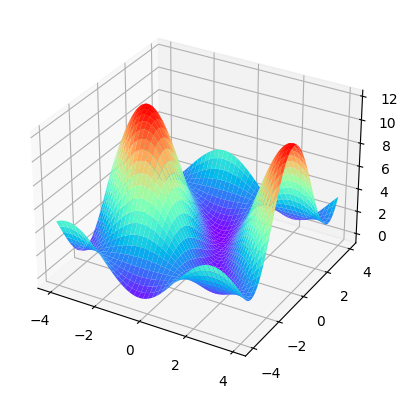

In [9]:
list1 = Newton(R2, dR2, H, 0.5, -1, 0.000001, 50, param)
ax1 = plt.axes(projection='3d')
X = np.arange(-4, 4, 0.05)
Y = np.arange(-4, 4, 0.05)
Z = [[0]*len(Y) for i in range(len(X))]

for i in range(len(X)):
    for j in range(len(Y)):
        f = R2([X[i], Y[j]],param)
        Z[j][i] = f
Z1 = np.array(Z)

X, Y = np.meshgrid(X, Y)
#plt.contour(X,Y,Z1,20)
#print(list1[0])
#plt.scatter(list1[0],list1[1])
ax1.scatter3D(list1[0], list1[1],list1[2],c='r')  #绘制散点图
ax1.plot_surface(X, Y, Z1, cmap='rainbow')
#ax1.contour(X,Y,Z1,offset=-1,cmap='rainbow')

plt.show()

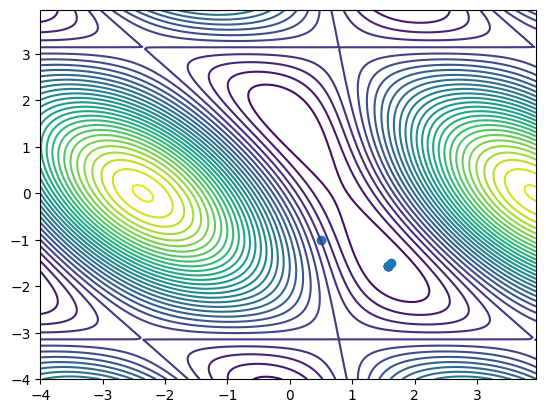

In [10]:
plt.contour(X,Y,Z1,30)
plt.scatter(list1[0],list1[1])

In [11]:
# Print des solutions
print(f"Theta1 = {list1[0][-1]} \nTheta2 = {list1[1][-1]}")

Theta1 = 1.5707963267948966 
Theta2 = -1.5707963267948966


### ECH etPositiion 

Dans un premiers temps on calcule 20 echantillion de theta puis on calcule la trajectoir de notre bras avec ces 20 echatilllion  

In [12]:
def ech(thetadepart,thetafinal):
    l1 , l2 = 1,1

    theta1_start , theta2_start = thetadepart
    theta1_final , theta2_final = thetafinal

    theta1 = np.linspace(theta1_start, theta1_final, num=20)
    theta2 = np.linspace(theta2_start, theta2_final, num=20)

    return theta1, theta2

In [13]:
def traj(theta1,theta2):
    x = []
    y = []
    l1=1
    l2=1
    for i in range(len(theta1)):

        x_ = np.cumsum([0,
                    l1 * np.cos(theta1[i]),
                    l2 * np.cos(theta1[i]+theta2[i])])
                    
        y_ = np.cumsum([0,
                    l1 * np.sin(theta1[i]),
                    l2 * np.sin(theta1[i]+theta2)[i]])

        x.append(x_)
        y.append(y_)
    return x,y

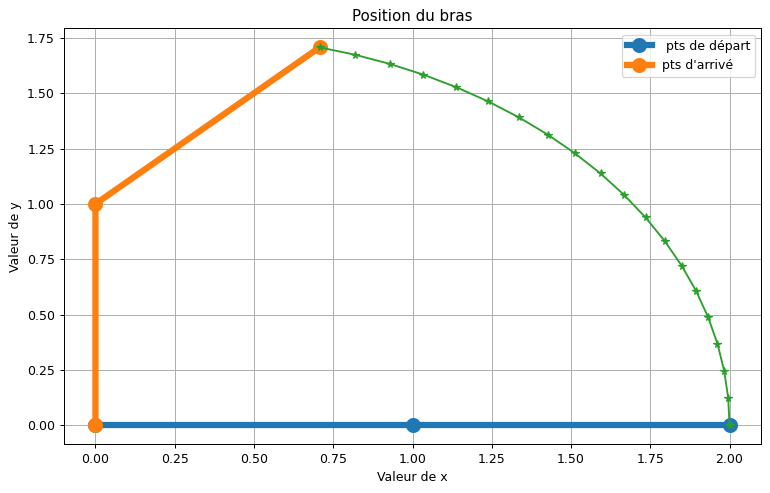

In [14]:
theta1 , theta2 = ech([0 , 0],[np.pi/2 , -np.pi/4])

x , y = traj(theta1,theta2)
tabx,taby = [],[]
for i in range(len(x)):
    tabx.append(x[i][2])
    taby.append(y[i][2])
l1=1
l2=1
# #Tracé de la trajectoire avec minimize
plt.figure(figsize=(10, 6), dpi=90)
plt.plot(x[0], y[0], 'o-', lw=5, mew=6)
plt.plot(x[-1], y[-1], 'o-', lw=5, mew=6)
plt.legend([' pts de départ',"pts d'arrivé"])
plt.plot(tabx, taby , '-*' )
plt.title('Position du bras')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()

In [42]:
tab_minimiz = []
tab_root = []
tab_gradient = []
tab_newton = []
x , y = traj(theta1,theta2)
print(len(y))
for i in range(len(x)):

    param = [L1, L2, tabx[i], taby[i]]

    # Résolution avec la méthode de Roor
    tab_root.append(scipy.optimize.root(R,[0,0],param).x)

    # Résolution avec la méthode de minimize 
    tab_minimiz.append(scipy.optimize.minimize(R2,[0,0],param, method='SLSQP').x)

    # Résolution avec la combien Newton et gradient 
    # Apres plusieur teste il s'est avéré que il vaut mieux utilisé une combine entre la méthode de newton et le gradient 
    point_X, point_Y, point_Z = grad(R2,dR2 , 0.5, -1, 0.1, 0.000001, 100, param)
    tab = point_X[-1], point_Y[-1]
    tab_gradient.append(tab)
    liste = Newton(R2, dR2, H, point_X[-1],point_Y[-1], 0.000001, 100, param)
    tab2 = liste[0][-1],liste[1][-1]
    tab_newton.append(tab2)

tab_root = np.array(tab_root)
tab_minimiz = np.array(tab_minimiz)
tab_gradient = np.array(tab_gradient)
tab_newton = np.array(tab_newton )

20


## Tracé la trajectoire avec la méthode root

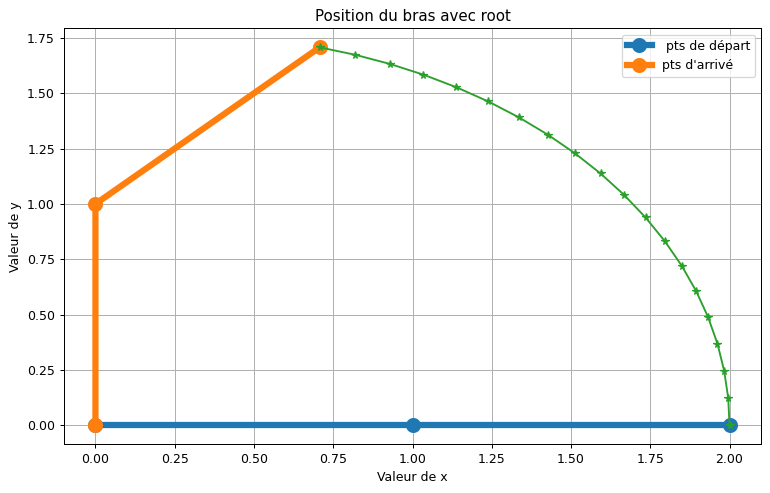

In [43]:
x , y = traj(tab_root[:,0],tab_root[:,1])
tabx_,taby_ = [],[]
for i in range(len(x)):
    tabx_.append(x[i][2])
    taby_.append(y[i][2])
l1=1
l2=1
# #Tracé de la trajectoire avec minimize
plt.figure(figsize=(10, 6), dpi=90)
plt.plot(x[0], y[0], 'o-', lw=5, mew=6)
plt.plot(x[-1], y[-1], 'o-', lw=5, mew=6)
plt.legend([' pts de départ',"pts d'arrivé"])
plt.plot(tabx_, taby_ , '-*' )
plt.title('Position du bras avec root')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()

blabla....

Tracé la trajectoir avec la méthode minimize

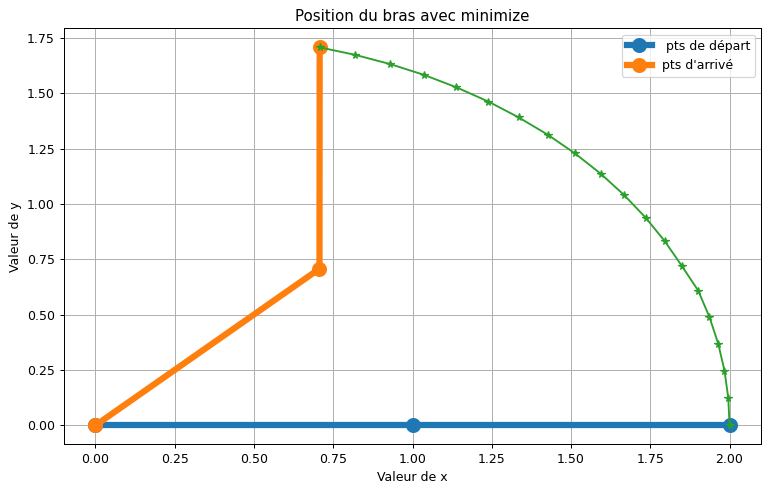

In [44]:
x , y = traj(tab_minimiz[:,0],tab_minimiz[:,1])
tabx_,taby_ = [],[]
for i in range(len(x)):
    tabx_.append(x[i][2])
    taby_.append(y[i][2])
l1=1
l2=1
# #Tracé de la trajectoire avec minimize
plt.figure(figsize=(10, 6), dpi=90)
plt.plot(x[0], y[0], 'o-', lw=5, mew=6)
plt.plot(x[-1], y[-1], 'o-', lw=5, mew=6)
plt.legend([' pts de départ',"pts d'arrivé"])
plt.plot(tabx_, taby_ , '-*' )
plt.title('Position du bras avec minimize')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()

blablabla ...

## Tracé la trajectoir avec la méthode du gradient a pas fixe


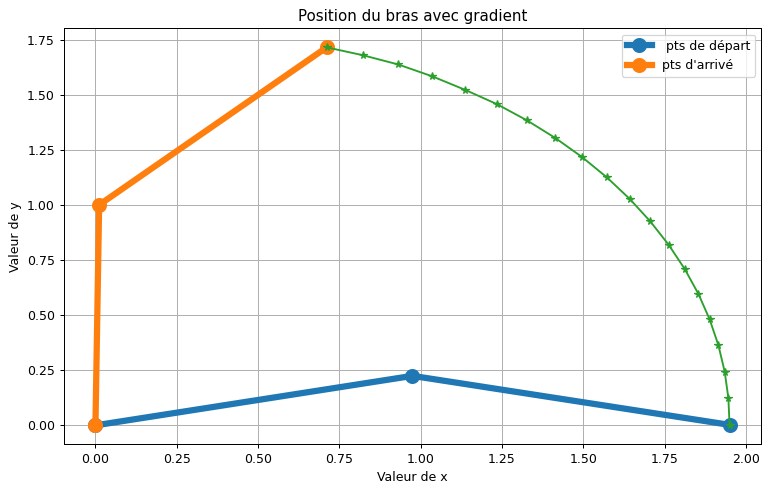

In [45]:
x , y = traj(tab_gradient[:,0],tab_gradient[:,1])
tabx_,taby_ = [],[]
for i in range(len(x)):
    tabx_.append(x[i][2])
    taby_.append(y[i][2])
l1=1
l2=1
# #Tracé de la trajectoire avec minimize
plt.figure(figsize=(10, 6), dpi=90)
plt.plot(x[0], y[0], 'o-', lw=5, mew=6)
plt.plot(x[-1], y[-1], 'o-', lw=5, mew=6)
plt.legend([' pts de départ',"pts d'arrivé"])
plt.plot(tabx_, taby_ , '-*' )
plt.title('Position du bras avec gradient')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()

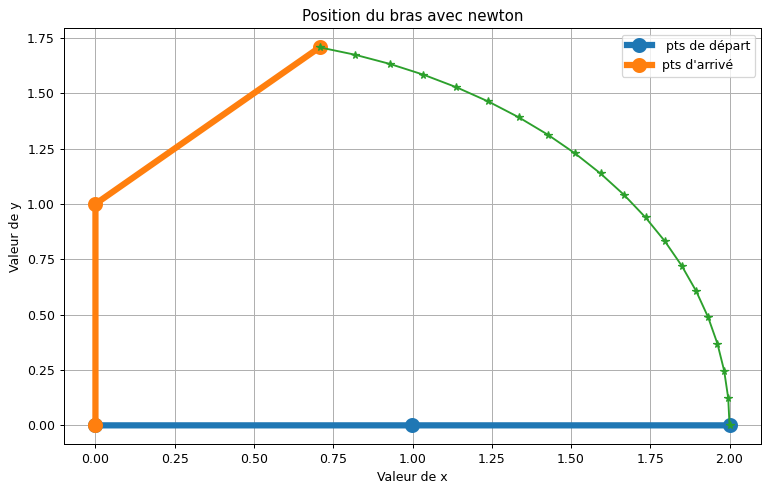

In [46]:
x , y = traj(tab_newton[:,0],tab_newton[:,1])
tabx_,taby_ = [],[]
for i in range(len(x)):
    tabx_.append(x[i][2])
    taby_.append(y[i][2])
l1=1
l2=1
# #Tracé de la trajectoire avec minimize
plt.figure(figsize=(10, 6), dpi=90)
plt.plot(x[0], y[0], 'o-', lw=5, mew=6)
plt.plot(x[-1], y[-1], 'o-', lw=5, mew=6)
plt.legend([' pts de départ',"pts d'arrivé"])
plt.plot(tabx_, taby_ , '-*' )
plt.title('Position du bras avec newton')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()